In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress


In [3]:
csvfile = "Project_data_Children_under_5.csv"

In [4]:
dataframe = pd.read_csv(csvfile)

dataframe.head()

,state,Survey,Area,Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males),Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%),Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%),Child Feeding Practices And Nutritional Status Of Children - Children Under Age 6 Months Exclusively Breastfed (%),Child Feeding Practices And Nutritional Status Of Children - Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%,Child Feeding Practices And Nutritional Status Of Children - Non-Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%,Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%),Child Feeding Practices And Nutritional Status Of Children - Total Children Age 6-23 Months Receiving An Adequate Diet (%
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6


In [5]:
dataframe.columns

Index(['state', 'Survey', 'Area',
       'Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males)',
       'Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%)',
       'Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%)',
       'Child Feeding Practices And Nutritional Status 

In [6]:
dataframe2 = dataframe.rename(columns={"Population And Household Profile - Sex Ratio At Birth For Children Born In The Last Five Years (Females Per 1000 Males)":"Gender_Aged_5years(Females per 1000 Males)",
                          "Population And Household Profile - Children Under Age 5 Years Whose Birth Was Registered (%)":"Children_Registered",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Stunted (Height-For-Age) (%)":"Children_Stunted_5years(Height-For-Age)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Wasted (Weight-For-Height) (%)":"Children_Wasted(Weight-For-Height)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Severely Wasted (Weight-For-Height) (%)":"Children_Severely_Wasted(Weight-For-Height)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under 5 Years Who Are Underweight (Weight-For-Age) (%)":"Children_Underweight_5years(Weight-For-Age)",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under Age 3 Years Breastfed Within One Hour Of Birth (%)":"Children_Breastfed_Within_One_Hour_Of_Birth_3years",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Under Age 6 Months Exclusively Breastfed (%)":"Children_Under_Age_6_Months_Exclusively_Breastfed",
                          "Child Feeding Practices And Nutritional Status Of Children - Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%":"Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Non-Breastfeeding Children Age 6-23 Months Receiving An Adequate Diet (%":"Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%":"Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate_Diet",
                          "Child Feeding Practices And Nutritional Status Of Children - Children Age 6-8 Months Receiving Solid Or Semi-Solid Food And Breastmilk (%)":"Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk",
                          "Child Feeding Practices And Nutritional Status Of Children - Total Children Age 6-23 Months Receiving An Adequate Diet (%":"Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet"})
dataframe2.head()

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
0,India,NFHS-4,Total,919.0,79.7,38.4,21.0,7.5,35.7,41.6,54.9,8.7,14.3,42.7,9.6
1,India,NFHS-4,Rural,927.0,76.1,41.2,21.5,7.4,38.3,41.1,56.0,8.2,12.7,39.9,8.8
2,India,NFHS-4,Urban,899.0,88.8,31.0,20.0,7.5,29.1,42.8,52.1,10.1,16.9,50.1,11.6
3,India,NFHS-3,Total,914.0,41.2,48.0,19.8,6.4,42.5,23.4,46.4,NaN,NaN,52.6,NaN
4,Andhra Pradesh,NFHS-4,Total,914.0,82.7,31.4,17.2,4.5,31.9,40.1,70.2,6.5,11.9,56.1,7.6


In [7]:
Survey_NFHS = dataframe2.loc[dataframe2["Survey"] == "NFHS-3"]


df_nona = dataframe2.fillna(0)

In [8]:
Survey_NFHS3 = df_nona.loc[df_nona["Survey"] == "NFHS-3"]

In [9]:
Survey_NFHS4 = df_nona.loc[df_nona["Survey"] == "NFHS-4"]


In [10]:
Survey_NFHS4_rural = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Rural"]
Survey_NFHS4_urban = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Urban"]
Survey_NFHS4_total = Survey_NFHS4.loc[Survey_NFHS4["Area"] == "Total"]

Survey_NFHS4_rural2 = dataframe2.loc[dataframe2["Area"] == "Rural"]
Survey_NFHS4_urban2 = dataframe2.loc[dataframe2["Area"] == "Urban"]
Survey_NFHS4_Total2 = dataframe2.loc[dataframe2["Area"] == "Total"]

In [11]:
Top_five_Survey3 = Survey_NFHS3.nlargest(5,'Children_Stunted_5years(Height-For-Age)')

In [12]:
Bottom_five_Survey3 = dataframe2.nsmallest(5, 'Children_Stunted_5years(Height-For-Age)')

In [13]:
Survey_NFHS4_rural.nlargest(5,'Children_Stunted_5years(Height-For-Age)')
Survey_NFHS4_urban.nlargest(5,'Children_Stunted_5years(Height-For-Age)')
Survey_NFHS4_total.nlargest(5,'Children_Stunted_5years(Height-For-Age)')

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
12,Bihar,NFHS-4,Total,934.0,60.7,48.3,20.8,7.0,43.9,34.9,53.5,7.3,9.2,30.7,7.5
68,Uttar Pradesh,NFHS-4,Total,903.0,60.2,46.3,17.9,6.0,39.5,25.2,41.6,5.3,5.3,32.6,5.3
28,Jharkhand,NFHS-4,Total,919.0,65.0,45.3,29.0,11.4,47.8,33.2,64.8,7.2,7.1,47.2,7.2
100,Meghalaya,NFHS-4,Total,1009.0,79.8,43.8,15.3,6.5,29.0,60.6,35.8,24.2,19.8,67.4,23.6
40,Madhya Pradesh,NFHS-4,Total,927.0,81.9,42.0,25.8,9.2,42.8,34.5,58.2,6.9,4.8,38.1,6.6


In [14]:
Survey_NFHS4_rural2.nsmallest(5,'Children_Stunted_5years(Height-For-Age)')
Survey_NFHS4_urban2.nsmallest(5,'Children_Stunted_5years(Height-For-Age)')
Survey_NFHS4_Total2.nsmallest(5,'Children_Stunted_5years(Height-For-Age)')

,state,Survey,Area,Gender_Aged_5years(Females per 1000 Males),Children_Registered,Children_Stunted_5years(Height-For-Age),Children_Wasted(Weight-For-Height),Children_Severely_Wasted(Weight-For-Height),Children_Underweight_5years(Weight-For-Age),Children_Breastfed_Within_One_Hour_Of_Birth_3years,Children_Under_Age_6_Months_Exclusively_Breastfed,Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Non-Breastfeeding_Children_Age_6-23_Months_Receiving_An_Adequate Diet,Children_Age_6-8_Months_Receiving_Solid_Or_Semi-Solid_Food_And_Breastmilk,Total_Children_Age_6-23_Months_Receiving_An_Adequate Diet
36,Kerala,NFHS-4,Total,1047.0,97.7,19.7,15.7,6.5,16.1,64.3,53.3,21.3,22.3,63.1,21.4
84,Goa,NFHS-4,Total,966.0,98.9,20.1,21.9,9.5,23.8,73.3,60.9,9.1,15.1,NaN,10.4
124,Andaman and Nicobar Islands,NFHS-4,Total,859.0,97.9,23.3,18.9,7.5,21.6,41.9,66.8,13.5,17.6,45.1,14.2
136,Daman and Diu,NFHS-4,Total,923.0,91.5,23.4,24.1,11.9,26.7,55.8,52.3,6.2,7.4,NaN,6.5
144,Puducherry,NFHS-4,Total,843.0,99.0,23.7,23.6,7.8,22.0,65.3,45.5,21.8,54.8,76.8,31.1


In [31]:
topfive = Top_five_Survey3["Children_Stunted_5years(Height-For-Age)"]
bottomfive = Bottom_five_Survey3["Children_Stunted_5years(Height-For-Age)"]
Bottomverustop = topfive.add(bottomfive, fill_value=0)

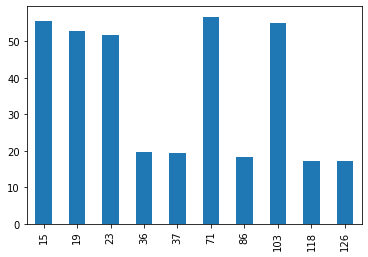

In [33]:
Bottomverustop.plot(kind="bar")

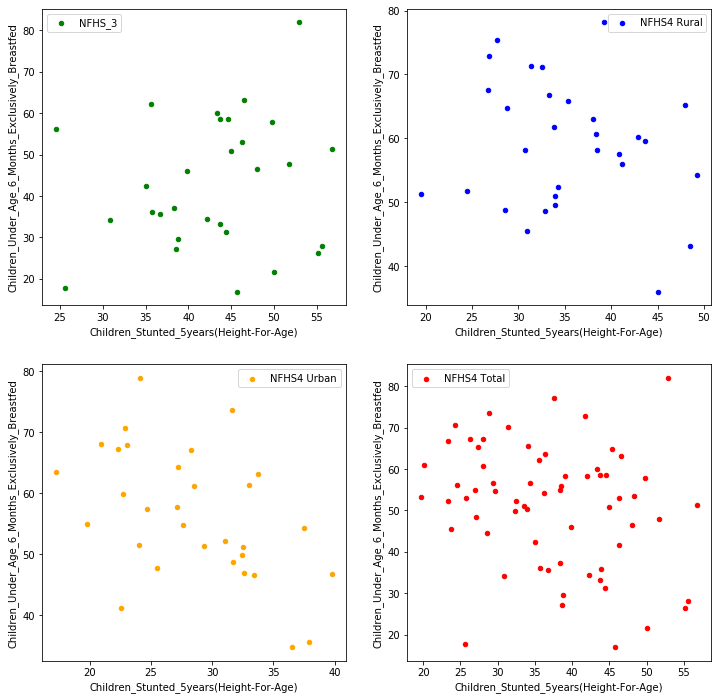

In [53]:
x1 = Survey_NFHS3["Children_Stunted_5years(Height-For-Age)"]
y1 = Survey_NFHS3["Children_Under_Age_6_Months_Exclusively_Breastfed"]
x2 = Survey_NFHS4_rural2["Children_Stunted_5years(Height-For-Age)"]
y2 = Survey_NFHS4_rural2["Children_Under_Age_6_Months_Exclusively_Breastfed"]
x3 = Survey_NFHS4_urban2["Children_Stunted_5years(Height-For-Age)"]
y3 = Survey_NFHS4_urban2["Children_Under_Age_6_Months_Exclusively_Breastfed"]
x4 = Survey_NFHS4_Total2["Children_Stunted_5years(Height-For-Age)"]
y4 = Survey_NFHS4_Total2["Children_Under_Age_6_Months_Exclusively_Breastfed"]



#NFHS4 Female Child per 1000 males per state
x_join1 = Survey_NFHS[["Children_Stunted_5years(Height-For-Age)","Children_Under_Age_6_Months_Exclusively_Breastfed"]]
x_join2 = Survey_NFHS4_rural2[["Children_Stunted_5years(Height-For-Age)","Children_Under_Age_6_Months_Exclusively_Breastfed"]]
x_join3 = Survey_NFHS4_urban2[["Children_Stunted_5years(Height-For-Age)","Children_Under_Age_6_Months_Exclusively_Breastfed"]]
x_join4 = Survey_NFHS4_Total2[["Children_Stunted_5years(Height-For-Age)","Children_Under_Age_6_Months_Exclusively_Breastfed"]]




fig, axes = plt.subplots(nrows=2, ncols=2)
x_join1.plot(kind='scatter',x='Children_Stunted_5years(Height-For-Age)',y='Children_Under_Age_6_Months_Exclusively_Breastfed',ax=axes[0,0],color="green",label= "NFHS_3",figsize=(12,12))
x_join2.plot(kind='scatter',x='Children_Stunted_5years(Height-For-Age)',y='Children_Under_Age_6_Months_Exclusively_Breastfed',ax=axes[0,1],color="blue",label= "NFHS4 Rural",figsize=(12,12))
x_join3.plot(kind='scatter',x='Children_Stunted_5years(Height-For-Age)',y='Children_Under_Age_6_Months_Exclusively_Breastfed',ax=axes[1,0],color="orange",label= "NFHS4 Urban",figsize=(12,12))
x_join4.plot(kind='scatter',x='Children_Stunted_5years(Height-For-Age)',y='Children_Under_Age_6_Months_Exclusively_Breastfed',ax=axes[1,1],color="red",label= "NFHS4 Total",figsize=(12,12))

The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed 0.77


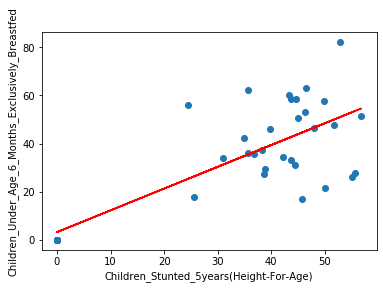

In [56]:
corr=round(st.pearsonr(Survey_NFHS3["Children_Stunted_5years(Height-For-Age)"],Survey_NFHS3["Children_Under_Age_6_Months_Exclusively_Breastfed"])[0],2)
print(f"The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed {corr}")
model = st.linregress(Survey_NFHS3["Children_Stunted_5years(Height-For-Age)"],Survey_NFHS3["Children_Under_Age_6_Months_Exclusively_Breastfed"])
y_values = Survey_NFHS3["Children_Stunted_5years(Height-For-Age)"]*model[0]+model[1]
plt.scatter(Survey_NFHS3["Children_Stunted_5years(Height-For-Age)"],Survey_NFHS3["Children_Under_Age_6_Months_Exclusively_Breastfed"])
plt.plot(Survey_NFHS3["Children_Stunted_5years(Height-For-Age)"],y_values,color="red")
plt.xlabel('Children_Stunted_5years(Height-For-Age)')
plt.ylabel('Children_Under_Age_6_Months_Exclusively_Breastfed')
plt.show()

In [61]:
corr=round(st.pearsonr(Survey_NFHS4_rural["Children_Stunted_5years(Height-For-Age)"],Survey_NFHS4_rural["Children_Under_Age_6_Months_Exclusively_Breastfed"])[0],2)
print(f"The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed (Rural) {corr}")
model = st.linregress(Survey_NFHS4_rural2["Children_Stunted_5years(Height-For-Age)"],Survey_NFHS4_rural2["Children_Under_Age_6_Months_Exclusively_Breastfed"])
y_values = Survey_NFHS4_rural2["Children_Stunted_5years(Height-For-Age)"]*model[0]+model[1]
plt.scatter(Survey_NFHS4_rural["Children_Stunted_5years(Height-For-Age)"],Survey_NFHS4_rural2["Children_Under_Age_6_Months_Exclusively_Breastfed"])
plt.plot(Survey_NFHS4_rural2["Children_Stunted_5years(Height-For-Age)"],y_values,color="red")
plt.xlabel('Children_Stunted_5years(Height-For-Age)')
plt.ylabel('Children_Under_Age_6_Months_Exclusively_Breastfed')
plt.show()

ValueError: array must not contain infs or NaNs

The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed (urban) 0.27


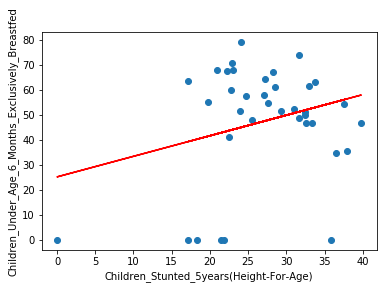

In [59]:
corr=round(st.pearsonr(Survey_NFHS4_urban["Children_Stunted_5years(Height-For-Age)"],Survey_NFHS4_urban["Children_Under_Age_6_Months_Exclusively_Breastfed"])[0],2)
print(f"The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed (urban) {corr}")
model = st.linregress(Survey_NFHS4_urban["Children_Stunted_5years(Height-For-Age)"],Survey_NFHS4_urban["Children_Under_Age_6_Months_Exclusively_Breastfed"])
y_values = Survey_NFHS4_urban["Children_Stunted_5years(Height-For-Age)"]*model[0]+model[1]
plt.scatter(Survey_NFHS4_urban["Children_Stunted_5years(Height-For-Age)"],Survey_NFHS4_urban["Children_Under_Age_6_Months_Exclusively_Breastfed"])
plt.plot(Survey_NFHS4_urban["Children_Stunted_5years(Height-For-Age)"],y_values,color="red")
plt.xlabel('Children_Stunted_5years(Height-For-Age)')
plt.ylabel('Children_Under_Age_6_Months_Exclusively_Breastfed')
plt.show()

The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed (Total) -0.03


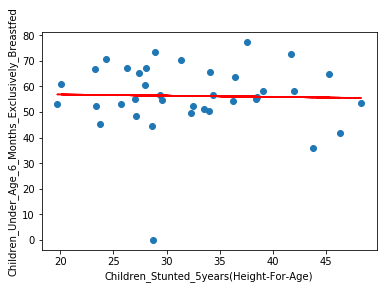

In [60]:
corr=round(st.pearsonr(Survey_NFHS4_total["Children_Stunted_5years(Height-For-Age)"],Survey_NFHS4_total["Children_Under_Age_6_Months_Exclusively_Breastfed"])[0],2)
print(f"The correlation between Stunted Height and Children_Under_Age_6_Months_Exclusively_Breastfed (Total) {corr}")
model = st.linregress(Survey_NFHS4_total["Children_Stunted_5years(Height-For-Age)"],Survey_NFHS4_total["Children_Under_Age_6_Months_Exclusively_Breastfed"])
y_values = Survey_NFHS4_total["Children_Stunted_5years(Height-For-Age)"]*model[0]+model[1]
plt.scatter(Survey_NFHS4_total["Children_Stunted_5years(Height-For-Age)"],Survey_NFHS4_total["Children_Under_Age_6_Months_Exclusively_Breastfed"])
plt.plot(Survey_NFHS4_total["Children_Stunted_5years(Height-For-Age)"],y_values,color="red")
plt.xlabel('Children_Stunted_5years(Height-For-Age)')
plt.ylabel('Children_Under_Age_6_Months_Exclusively_Breastfed')
plt.show()